In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from diffprivlib.models import LogisticRegression as DPLR

from utils import convert_to_cat
from utils import get_synthesizer, get_quail_synthesizer, save_synthetic_data, plot_distributions
from utils import get_classification_summary, get_table_metrics, get_epsilon_plots
from utils import dp_model_classification_helper, get_dp_model_table_metrics

In [9]:
import warnings
warnings.filterwarnings('ignore')

# 1. Convert all columns to categorical

In [2]:
# Read in the original data
adult_cols = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_week', 'native_country', 'label']
adult_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_data = pd.read_csv(adult_path, skipinitialspace=True, names=adult_cols, index_col=False)
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Get the processed adult data
processed_adult = convert_to_cat(adult_data)
processed_adult

,age,workclass,education,education_num,occupation,relationship,race,sex,hours_week,label
0,0,0,0,13,0,0,0,1,0,0
1,1,1,0,13,1,1,0,1,1,0
2,0,2,1,9,2,0,0,1,0,0
3,1,2,2,7,2,1,1,1,0,0
4,2,2,0,13,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,2,2,6,12,10,2,0,0,0,0
32557,0,2,1,9,9,1,0,1,0,1
32558,1,2,1,9,0,4,0,0,0,0
32559,3,2,1,9,0,3,0,1,1,0


In [4]:
# Print out dtype of all columns
print(processed_adult.dtypes)

age              int64
workclass        int64
education        int64
education_num    int64
occupation       int64
relationship     int64
race             int64
sex              int64
hours_week       int64
label            int64
dtype: object


In [5]:
# Split processed data into train and test
processed_train, processed_test = train_test_split(processed_adult, test_size=0.2, random_state=0)

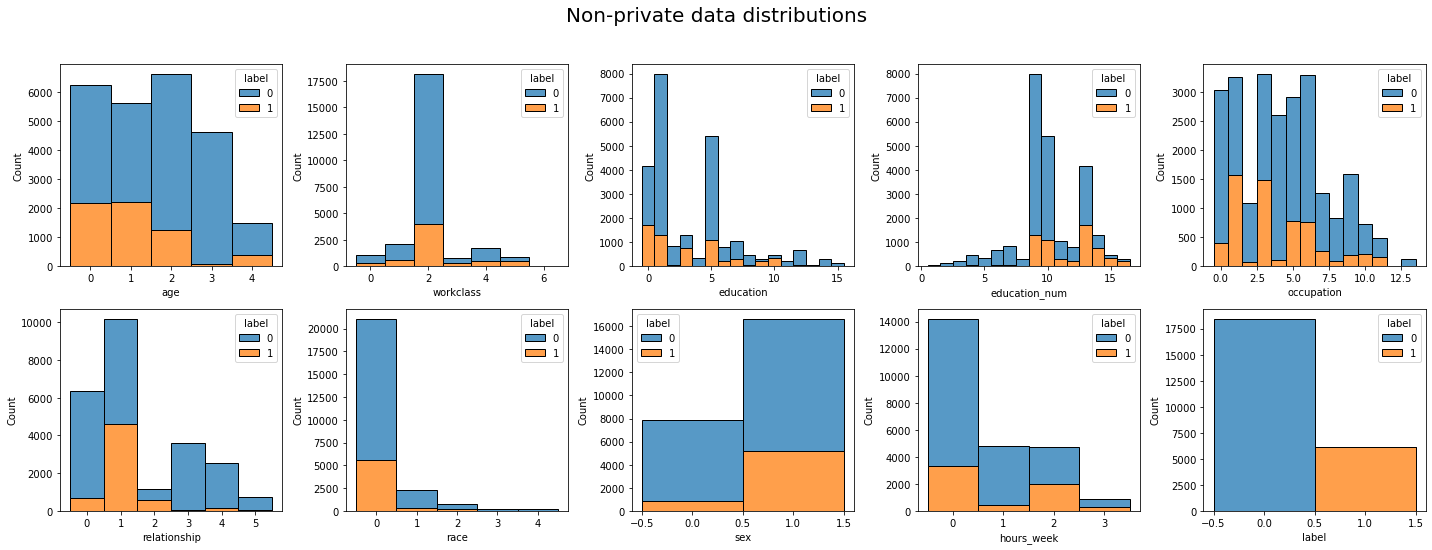

In [15]:
# Plot the non-private distributions
plot_distributions(processed_train, title="Non-private data distributions")

# 2. Train binary classifier on non-private data

In [16]:
y_train_pred, y_test_pred = get_classification_summary(processed_train, processed_test, classifier="logistic")
print(f"Avg train pred: {np.mean(y_train_pred):.4f}, Avg test pred: {np.mean(y_test_pred):.4f}")


CLASSIFICATION RESULTS (logistic, eval on test data)

True positive rates:
Female: 0.0519, Male: 0.4458

False positive rates:
Female: 0.0056, Male: 0.1024

Equalized odds distances:
y=1: 0.3938, y=0: 0.0968

Classification accuracies:
Female: 0.8867, Male: 0.7531

F1-score: 0.4904

Avg train pred: 0.1415, Avg test pred: 0.1460


# 3. New MWEM synthesis

# 4. New DP-CTGAN synthesis

In [ ]:
# Set range of epsilon values
epsilon_vals = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

# Generate 10 repetitions of synthetic data with DP-CTGAN 
save_synthetic_data(epsilon_vals, processed_train, synthesizer="DPCTGAN", n_reps=10)

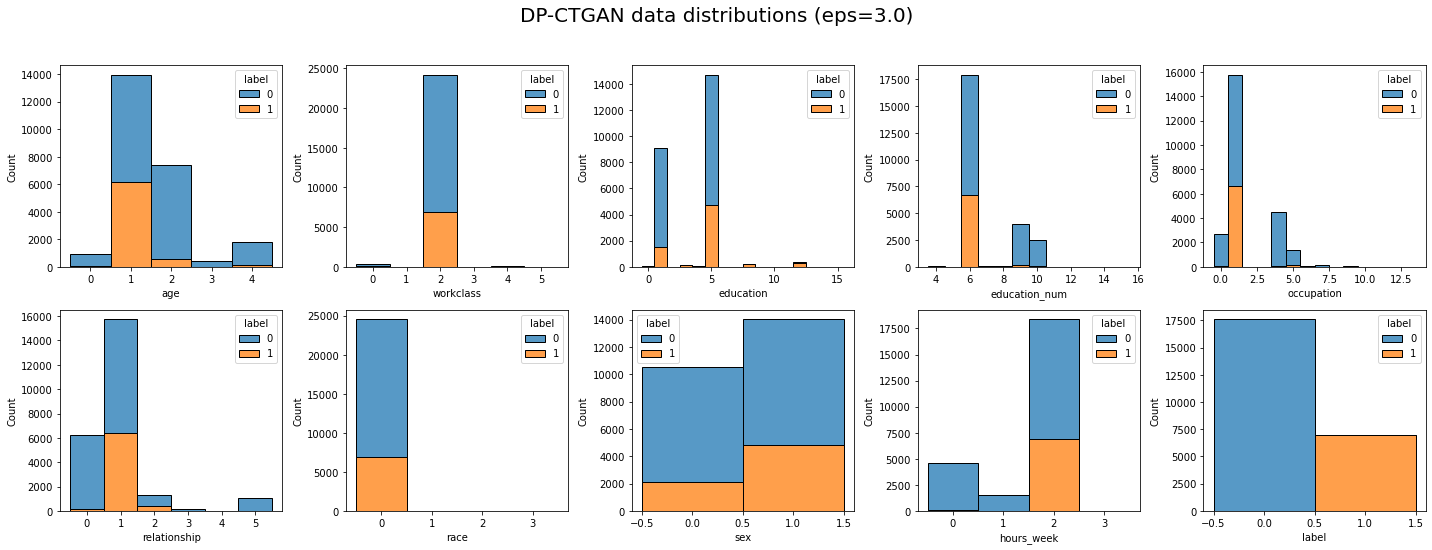

In [18]:
DPCTGAN_eps3_rep0 = pd.read_csv("DPCTGAN_eps=3.0_rep=0.csv", index_col=0)
plot_distributions(DPCTGAN_eps3_rep0, title="DP-CTGAN data distributions (eps=3.0)")

In [19]:
# Plot the table metrics for DPCTGAN with logistic regression
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("DPCTGAN", epsilon_list=[3.0], nreps=10, classifier="logistic", test_df=processed_test)
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.182
FPR difference median: 0.100
F1-score median: 0.370


In [20]:
# Plot the table metrics for DPCTGAN with random forest
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("DPCTGAN", epsilon_list=[3.0], nreps=10, classifier="forest", test_df=processed_test)
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.276
FPR difference median: 0.101
F1-score median: 0.464


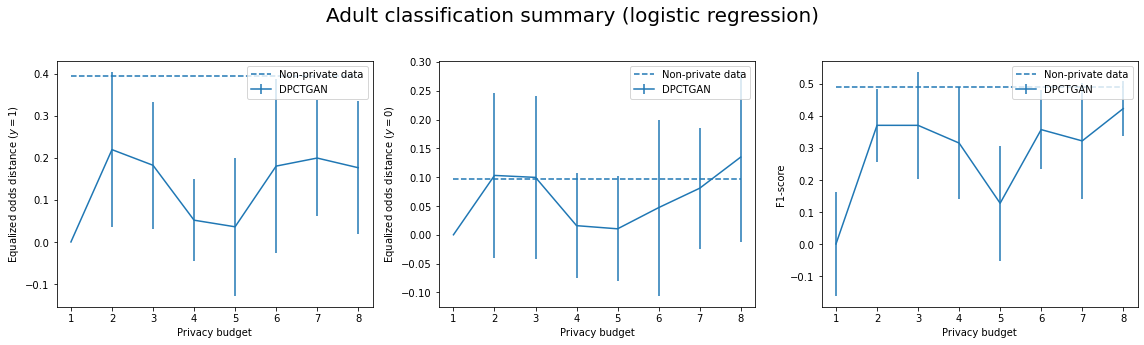

In [22]:
# Plot new DP-CTGAN results at range of epsilon values
get_epsilon_plots(["DPCTGAN"], epsilon_vals, 10, "logistic", processed_test, "median", processed_train, dataset="adult")

# 5. New PATE-CTGAN synthesis

In [44]:
# Set range of epsilon values
epsilon_vals = [3.0]

# Generate 10 repetitions of synthetic data with DP-CTGAN 
save_synthetic_data(epsilon_vals, processed_train, synthesizer="PATECTGAN", n_reps=10)

Completed eps=3.0, rep=1.
Completed eps=3.0, rep=2.
Completed eps=3.0, rep=3.
Completed eps=3.0, rep=4.
Completed eps=3.0, rep=5.
Completed eps=3.0, rep=6.
Completed eps=3.0, rep=7.
Completed eps=3.0, rep=8.
Completed eps=3.0, rep=9.
Completed eps=3.0, rep=10.


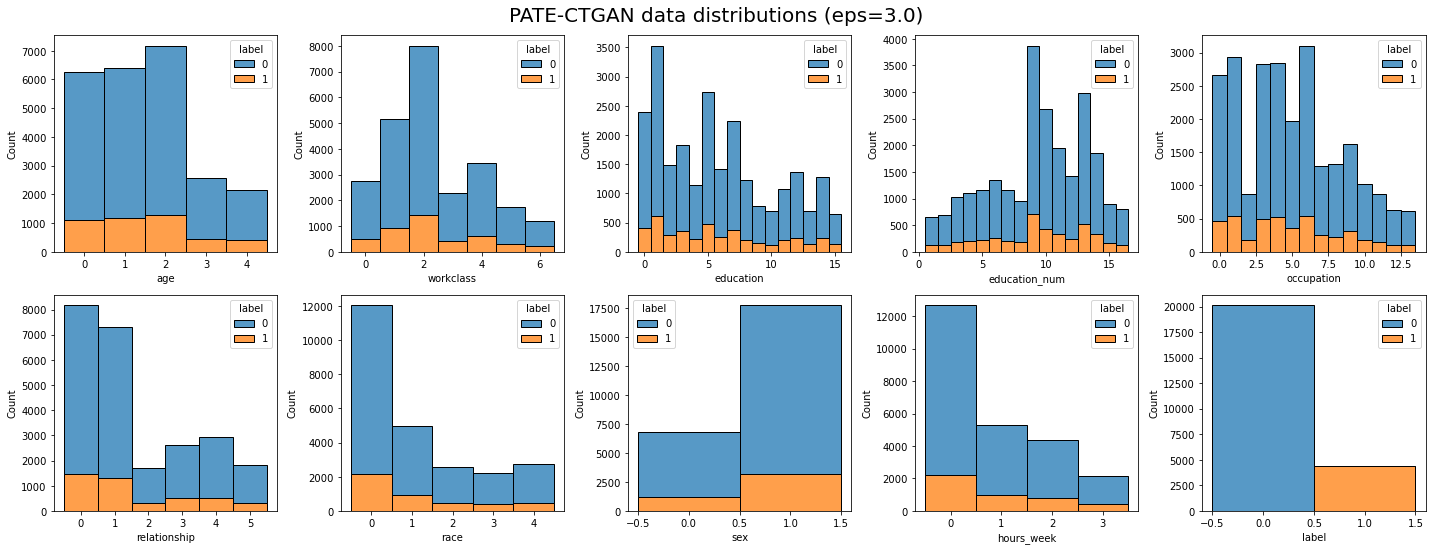

In [12]:
PATECTGAN_eps3_rep0 = pd.read_csv("PATECTGAN_eps=3.0_rep=0.csv", index_col=0)
plot_distributions(PATECTGAN_eps3_rep0, title="PATE-CTGAN data distributions (eps=3.0)")

In [13]:
# Plot the table metrics for PATECTGAN with logistic regression
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("PATECTGAN", epsilon_list=[3.0], nreps=10, classifier="logistic", test_df=processed_test)
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.000
FPR difference median: 0.000
F1-score median: 0.000


In [14]:
# Plot the table metrics for PATECTGAN with random forest
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("PATECTGAN", epsilon_list=[3.0], nreps=10, classifier="forest", test_df=processed_test)
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.018
FPR difference median: 0.015
F1-score median: 0.032


# 6. Comparison to DPLR

In [10]:
# Set range of epsilon values
epsilon_vals = [3.0]

# Calculate the median results
tpr_diff_median, fpr_diff_median, f1_score_median = get_dp_model_table_metrics(epsilon_vals, 10, "logistic", processed_train, processed_test, dataset="adult")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.408
FPR difference median: 0.098
F1-score median: 0.492


# 7. Comparison to k-anonymity